In [1]:
!pip uninstall -y jax jaxlib
!pip install --upgrade jax jaxlib --no-cache-dir


Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: jaxlib 0.5.1
Uninstalling jaxlib-0.5.1:
  Successfully uninstalled jaxlib-0.5.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import random

/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.6.0, so it will not be used.
  warnings.warn(


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/project/hrv_features_to_emotions.csv")

In [6]:
df.head(2000)

,Happy,Sad,Anger,Neutral,raw data,length,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,...,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci
0,Moderate,VeryLow,VeryLow,VeryHigh,"[16.51, 16.496, 16.5, 16.492, 16.492, 16.494, ...",5000,652.137931,656.0,31.679128,18.973666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.342198
1,VeryLow,High,VeryHigh,VeryLow,"[16.51, 16.496, 16.5, 16.492, 16.492, 16.494, ...",5000,652.137931,656.0,31.679128,18.973666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.342198
2,Moderate,Moderate,Low,Moderate,"[11.273, 11.265, 11.274, 11.272, 11.269, 11.27...",5000,664.571429,660.0,37.731598,21.895374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.586668
3,Moderate,Moderate,VeryLow,Low,"[10.049, 10.065, 10.042, 10.008, 10.065, 10.07...",5000,712.153846,708.0,35.991123,24.761260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.839571
4,VeryLow,VeryLow,High,VeryLow,"[9.8221, 9.8296, 9.8246, 9.8414, 9.8504, 9.820...",5000,688.857143,680.0,29.959156,23.081177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.699737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,VeryLow,VeryLow,VeryLow,VeryLow,"[-10.528, -10.521, -10.512, -10.515, -10.529, ...",5000,786.000000,788.0,56.438757,58.097370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.939020
402,High,VeryLow,VeryLow,Moderate,"[-11.523, -11.55, -11.536, -11.539, -11.526, -...",5000,813.666667,804.0,59.092207,72.744939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.036636
403,Moderate,VeryLow,Low,VeryLow,"[9.4264, 9.5243, 9.5514, 9.5579, 9.5536, 9.547...",5000,818.608696,796.0,99.176496,73.092718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.606627
404,VeryLow,Moderate,VeryHigh,Low,"[2.8138, 2.7954, 2.8551, 2.8162, 2.7974, 2.820...",5000,816.521739,852.0,139.176731,85.917508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.375420


In [7]:
print(df.columns)

Index(['Happy', 'Sad', 'Anger', 'Neutral', 'raw data', 'length', 'MEAN_RR',
       'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25',
       'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'sampen', 'higuci'],
      dtype='object')


In [8]:
neutral_df = df[[
       'Neutral', 'MEAN_RR',
       'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25',
       'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'sampen', 'higuci']]

In [9]:
neutral_df.groupby('Neutral').size()

,0
Neutral,
High,5
Low,46
Moderate,24
VeryHigh,26
VeryLow,305


✅ Class weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0), 4: np.float64(1.0)}
Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2904 - loss: 1.5805 - val_accuracy: 0.5016 - val_loss: 1.3437
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5192 - loss: 1.3301 - val_accuracy: 0.5541 - val_loss: 1.1930
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5599 - loss: 1.1711 - val_accuracy: 0.5967 - val_loss: 1.0839
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5567 - loss: 1.1421 - val_accuracy: 0.6131 - val_loss: 1.0251
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6090 - loss: 1.0438 - val_accuracy: 0.6164 - val_loss: 0.9901
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5935 - loss: 1.0448 - val_accuracy: 0.6295 - val_loss: 0.9618
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6122 - loss: 0.9923 - val_accuracy: 0.6361 - val_loss: 

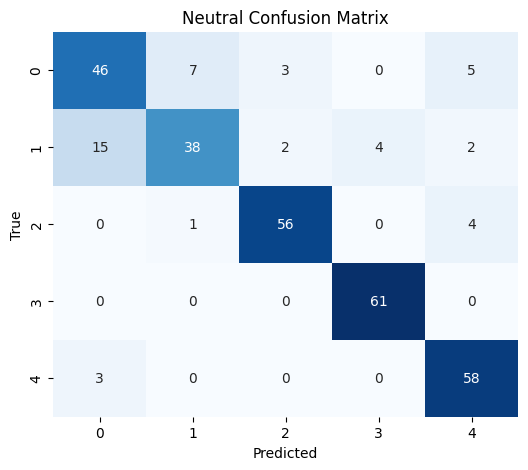

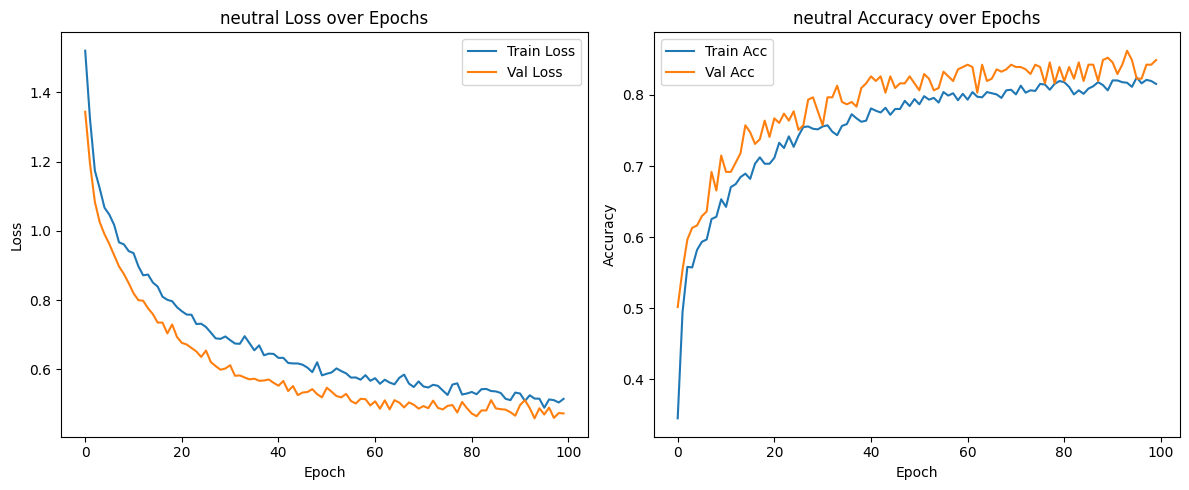

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# === STEP 1: DEFINE neutral_df ===
neutral_df = df[[  # your base dataframe
       'Neutral', 'MEAN_RR',
       'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25',
       'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'sampen', 'higuci'
]].copy()

# === STEP 2: MAP 'Neutral' LABELS TO INTS ===
neutral_mapping = {'VeryLow': 0, 'Low': 1, 'Moderate': 2, 'High': 3, 'VeryHigh': 4}
neutral_df['Neutral Encoded'] = neutral_df['Neutral'].map(neutral_mapping)

# Drop NaNs just in case (or alternatively you can fillna)
neutral_df = neutral_df.dropna()

# === STEP 3: EXTRACT FEATURES AND LABELS ===
feature_cols = neutral_df.drop(columns=['Neutral', 'Neutral Encoded']).columns.tolist()
X = neutral_df[feature_cols].values
y = neutral_df['Neutral Encoded'].values

# === STEP 4: BALANCE WITH SMOTE ===
smote = SMOTE(random_state=42, k_neighbors=min(5, len(np.unique(y)) - 1) )
X_resampled, y_resampled = smote.fit_resample(X, y)

# === STEP 5: ONE-HOT ENCODE LABELS ===
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_resampled_onehot = encoder.fit_transform(y_resampled.reshape(-1, 1))

# === STEP 6: SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled_onehot, test_size=0.2, random_state=42, stratify=y_resampled
)

# === STEP 7: SCALE ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === STEP 8: COMPUTE CLASS WEIGHTS (even after SMOTE) ===
y_resampled_flat = np.argmax(y_resampled_onehot, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled_flat), y=y_resampled_flat)
class_weight_dict = dict(enumerate(class_weights))
print("✅ Class weights:", class_weight_dict)

# === STEP 9: BUILD MODEL ===
def build_model(input_dim, optimizer_choice='adam', learning_rate=0.001):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(5, activation='softmax')
    ])

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Use 'adam', 'sgd', or 'rmsprop'.")

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

optimizer_choice = 'adam'
learning_rate = 0.001
model = build_model(X_train.shape[1], optimizer_choice, learning_rate)

# === STEP 10: TRAIN ===
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    class_weight=class_weight_dict,
    verbose=1
)

# === STEP 11: EVALUATE ===
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"✅ Final Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# === STEP 12: CLASSIFICATION REPORT ===
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("\n✅ Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# === STEP 13: CONFUSION MATRIX PLOT ===
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Neutral Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# === STEP 14: TRAINING HISTORY PLOT ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('neutral Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('neutral Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save("neutral_from_hrv_model.keras")
model.save("neutral_from_hrv_model.h5")

import joblib

# Save
joblib.dump(scaler, 'neutral_from_hrv_scaler.pkl')

from google.colab import files
files.download("neutral_from_hrv_model.keras")
files.download("neutral_from_hrv_model.h5")
files.download('neutral_from_hrv_scaler.pkl')